#CUSTOMER CHURN PREDICTION

The aim of this project is to develop a predictive model for customer churn in a subscription-based service or business. Customer churn, or customer attrition, refers to the rate at which customers stop using a service. By analyzing historical customer data and utilizing machine learning algorithms such as Logistic Regression, Random Forests, or Gradient Boosting,aim to predict which customers are likely to churn in the future.

Dataset link:https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction


Importing all the required libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import joblib
import tkinter as Tk
from tkinter import ttk
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9082,9083,15753161,Dickson,768,France,Female,36,5,180169.44,2,1,0,17348.56,0
8813,8814,15770375,Fanucci,850,Germany,Female,26,8,123126.29,1,1,0,74425.41,0
6338,6339,15784161,Hargreaves,583,Germany,Male,39,8,102945.01,1,0,0,52861.89,0
641,642,15580684,Feng,706,France,Female,29,5,112564.62,1,1,0,42334.38,0
937,938,15662100,Hsu,850,Germany,Female,44,5,128605.32,1,0,1,171096.20,0


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

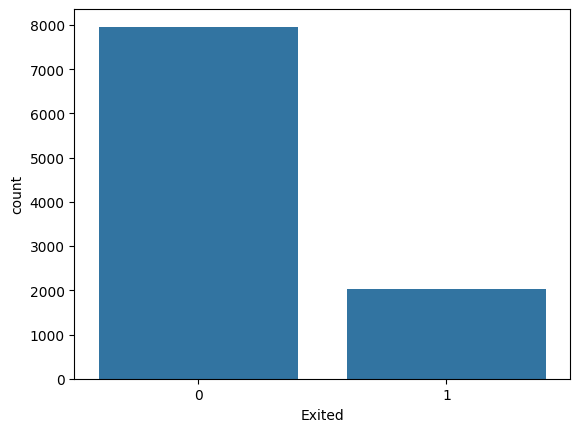

In [ ]:
sns.countplot(data=df,x='Exited')

In [ ]:
X = df.drop('Exited',axis=1)
Y = df['Exited']

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_predict1 = model.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_predict1)

0.808

In [ ]:
precision_score(Y_test,y_predict1)

0.5891472868217055

In [ ]:
recall_score(Y_test,y_predict1)

0.18673218673218672

In [ ]:
f1_score(Y_test,y_predict1)

0.2835820895522388

Handling Imbalanced data with SMOTE

In [ ]:
X_res,Y_res = SMOTE().fit_resample(X,Y)

In [ ]:
Y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=42)

See the difference between before and after applying SMOTE i.e we can see many changes in metrics while dealing with imbalanced data and balanced data

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_predict0 = model1.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_predict0)

0.6588198367859385

In [ ]:
precision_score(Y_test,y_predict0)

0.642594859241126

In [ ]:
recall_score(Y_test,y_predict0)

0.6761107533805538

In [ ]:
f1_score(Y_test,y_predict0)

0.6589268904926263

SVC

In [ ]:
model2 = svm.SVC()

In [ ]:
model2.fit(X_train,Y_train)

SVC()

In [ ]:
y_predict2 = model2.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_predict2)

0.5634023854362837

In [ ]:
precision_score(Y_test,y_predict2)

0.5377798507462687

KNeighbours Classifier

In [ ]:
model3 = KNeighborsClassifier()

In [ ]:
model3.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
y_predict3 = model3.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_predict3)

0.6738857501569366

In [ ]:
precision_score(Y_test,y_predict3)

0.6389189189189189

Decision Tree Classifier

In [ ]:
model4 = DecisionTreeClassifier()

In [ ]:
model4.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_predict4 = model4.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_predict4)

0.7966101694915254

In [ ]:
precision_score(Y_test,y_predict4)

0.777097366809553

Random Forest Classifier

In [ ]:
model5 = RandomForestClassifier()

In [ ]:
model5.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_predict5 = model5.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_predict5)

0.8647206528562461

In [ ]:
precision_score(Y_test,y_predict5)

0.8528301886792453

Gradient Boosting Classifier

In [ ]:
model6 = GradientBoostingClassifier()

In [ ]:
model6.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
y_predict6 = model6.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_predict6)

0.8408662900188324

In [ ]:
precision_score(Y_test,y_predict6)

0.8339719029374202

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC':[accuracy_score(Y_test,y_predict0),
                                 accuracy_score(Y_test,y_predict2),
                                 accuracy_score(Y_test,y_predict3),
                                 accuracy_score(Y_test,y_predict4),
                                 accuracy_score(Y_test,y_predict5),
                                 accuracy_score(Y_test,y_predict6)]})

In [ ]:
final_data

,Models,ACC
0,LR,0.658820
1,SVC,0.563402
2,KNN,0.673886
3,DT,0.796610
4,RF,0.864721
5,GBC,0.840866


<Axes: xlabel='Models', ylabel='ACC'>

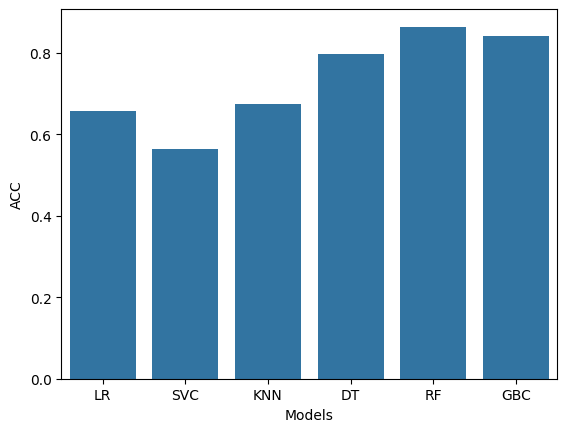

In [ ]:
sns.barplot(x="Models", y="ACC", data=final_data)

Best Model

In [ ]:
X_res=sc.fit_transform(X_res)

In [ ]:
model5.fit(X_res,Y_res)

RandomForestClassifier()

In [ ]:
joblib.dump(model5,'churn_predict_model')

['churn_predict_model']

In [ ]:
Fmodel = joblib.load('churn_predict_model')

In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
Fmodel.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1])

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 == 2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 == 3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1
    p10=int(e10.get())
    model = joblib.load('churn_model')
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                           p5,p6,
                           p7,p8,Geography_Germany,Geography_Spain,p10]]))

    if result == 0:
        Label(master, text="No Exit").grid(row=31)
    else:
        Label(master, text="Exit").grid(row=31)


master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")


label = Label(master, text = "Customers Churn Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProducts").grid(row=5)
Label(master, text="HasCrCard").grid(row=6)
Label(master, text="IsActiveMember").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography").grid(row=9)
Label(master,text="Gender").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

NameError: name 'Tk' is not defined